<h1>Computación cuántica con Qiskit</h1>

En este capitulo empezaremos a construir algoritmos cuánticos, teniendo en cuenta, los elementos vistos en los capitulos anteriores, inicialmente empezamos describiendo los elementos computacionales básicos que usaremos. Para empezar necesitamos llamar a la librería qiskit la cual contiene todas las funciones escenciales para construir nuestros estados cuánticos y poderlos ejecutar ya sea en un computador cuántico real o en un simulador de computador cuántico.

Para empezar llamamos a la librería **qiskit** (es de aclarar que una forma limpia de escribir código es no llamado todos los elementos de la librería si no, únicamente los escenciales a la hora de ejecutar el código en este caso llamaremos todos los métodos de la librería con **\***, de la siguiente forma:

In [1]:
from qiskit import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info import Statevector

como vemos en la celda de arriba también llamamos al método **visualization** que contiene las formas de graficar los circuitos cuánticos creados como veremos más adelante. El método **QasmSimulator** es el simulador de un computador cuántico que usaremos para generar nuestras mediciones; **Statevector**, nos ayuda a construir vectores estado como queramos.


Inicialmente, creamos qubits con un estado inicial $|0>$ con la función **QuantumCircuit()**, el parámetro inicial refiere al número de qubits usados y el segundo parámetro refiere al número de bits, donde se harán las correspondientes mediciones, es decir:

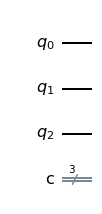

In [2]:
num_qubits = 3
num_bits = 3
circuito = QuantumCircuit(num_qubits,num_bits) #3qubits #3bits de medición
circuito.draw('mpl')

usamos el método **draw()** para graficar el circuito inicial que corresponde simplemente a un estado $|000>$, ordenado desde $q_{0}$, donde 0 indica el primer qubit y termina en $q_{2}$, donde 2 indica el tercer qubit, y c, los cbit o bits a la hora de hacer las mediciones correspondientes. Finalmente, el 3 al lado c, indica el número de bits que se usarán en el circuito, finalmente "mpl" dentro de la funcón **draw** indica que queremos graficar con la librería **MatPlotLib**.

A la hora de obtener nuestro vector estado en componentes matemáticas mediante la notación de Dirac usando el método **Statevector**, para construirlo necesitamos saber inicialmente el número de combinaciones posibles que podemos obtener con los qubits es decir:

para 1 qubit sabemos que podemos tener los vectores estados superpuestos $|0>$ y $|1>$ , es decir **dos** estados que se pueden superponer en un estado "general". Para 2 qubits obenemos los siguientes estados que se pueden superponer $|00>$, $|01>$, $|10>$ y $|11>$, o sea, **cuatro** estados que se pueden superponer en un estado "general" también. Si se hacen los cálculos para 3 qubits se obtienen **ocho** estados que se pueden superponer. Con lo cual, obtenemos la siguiente formula para conseguir el número de estados totales posibles de obtener que es
$2^{n}$. Con la información anteriormente dicha, podemos construir nuestro vector estado con Statevector y su método from_int, que necesita un parámetro que indique el estado base inicial o sea 0 en bits 000, el número posible de estados superpuestos que es $2^{n}$, para **"tomar de"** nuestro circuito y convertirlo a lectura matemática usamos el método evolve dentro de el estado generado y finalmente lo graficamos aclarando que queremos ver el estado en formato **latex**. 

In [3]:
estado = Statevector.from_int(0,2**num_qubits)
estado = estado.evolve(circuito)
estado.draw("latex")

<IPython.core.display.Latex object>

Al construir el circuito inicialmente  **QuantumCircuit()** genera un estado vector con la cantidad n de qubits 0. En el caso anterior al medir este estado, únicamente obtendremos el 100% de las mediciones 000, como veremos más amédelante en los resultados.

Para generar una medición sobre el circuito en todos los qubits usamos el método **measure()**, tal que:

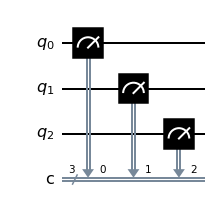

In [4]:
circuito.measure(0,0)
circuito.measure(1,1)
circuito.measure(2,2)
circuito.draw("mpl")

Lo que hace **measure()** es asociar un qubit con un cbit, tal que dicho cbit guarda la información del cubit medido, sea 1 o 0. Finalmente, tenemos dos opciones para ejecutar el circuito cuántico, mandarle dicho circuito a un computador cuántico o simularlo con algún método en qiskit. en este caso usaremos **Aer** que es un método que contiene los siguientes simuladores para computación cuántica, cada uno con usos distintos:

1. aer_simulator
2. aer_simulator_statevector
3. aer_simulator_density_matrix
4. aer_simulator_stabilizer
5. aer_simulator_matrix_product_state
6. aer_simulator_extended_stabilizer
7. aer_simulator_unitary
8. aer_simulator_superop
9. qasm_simulator
10. statevector_simulator
11. unitary_simulator
12. pulse_simulator

Para el ejemplo anterior usaremos **aer_simulator**

In [5]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(circuito, shots=100).result()
print(result)

Result(backend_name='aer_simulator', backend_version='0.10.3', qobj_id='d8d8ef0f-4abe-46aa-9187-0a684d5a633b', job_id='c9696683-fc53-496f-b38a-c12daf56c6ca', success=True, results=[ExperimentResult(shots=100, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 100}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2]], creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, metadata=None, n_qubits=3, name='circuit-2', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=359783974, metadata={'parallel_state_update': 4, 'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 3, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1, 2], 'num_clbits': 3, 'input_qubit_map': [[2, 2], [0, 0], [1, 1]], 'fusion': {'enabled': False}}, time_taken=0.000511947)], date=2022-04-14T13:11:38.036588, status=COMPLETED, stat

Como observamos en la celda de arriba es escoger el tipo de simulador con **get_backend()**, en este caso aer_simulator, luego de declarada la variable con un objeto con Aer, corremos nuestro circuito mediante el método **run()**, que necesita un parámetro como mínimo, que es el circuito a ejecutar y un segundo parámetro que se puede o no adicionar que es el número de mediciones que se hagan, con el circuito cuántico, en este caso como solo tenemos un estado $|000>$ obtendemos solo salidas de ese estado al 100%. luego obtenemos los resultados con el método **run()**, como vemos arriba al imprimir los resultados nos genera un diccionario que se vuelve un poco engorroso hace lectura de lo que se hizo, en este caso podemos ver propiedades del tipo de de simulador que usamos, su versión un identificado del proceso hecho, los resultados de "experimento", y más propiedades netamente de procesamiento y su simulador, en este caso sólo necesitamos los resultados asociados al experimento hecho, en este caso los conteos obtenidos por cada estado medido, esto lo hacemos con el método **get_counts()** y graficaremos dichos datos con **plot_histogram** que es una función construida con base a la funcion **hist()** de matplotlib.

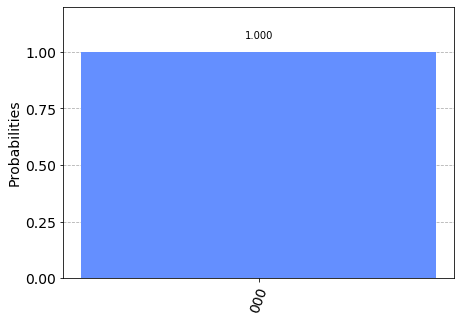

In [6]:
counts = result.get_counts()
plot_histogram(counts)

Con lo cual, finalmente obtenemos el resultado anterior en un histograma, que nos dice que con los 100 mediciones obtenemos el estado $|000>$ el 100% de las veces.

Ahora, correremos el mismo circuito pero en un computador cuántico **real**, en este caso llamamos el método **IBMQ** de la siguiente forma:

In [7]:
from qiskit import IBMQ

Antes de usar algún computador cuántico, lo primeor que tenemos que hacer es crear una cuenta en https://quantum-computing.ibm.com/. Luego de creada la cuenta, en la página principal nos aparecerá un **token** el cual asocia tu cuenta con el código que estamos creando, esto es necesario ya que con este token generamos una identificación con tu código y es más fácil para qiskit y los computadores cuánticos ordenar los resultados de tu circuito cuántico a correr. Con el método **save_account()** ingresamos el **token** (en este código no aparece el token personal usado para ejecutar el código aún asi dejamos el código del job generado al ejecutar este circuito en un computador cuántico real). Por si teniamos otro token guardado anteriormente, sobre escribimos la información con **overwrite** como se muestra en la siguiente linea:

In [8]:
IBMQ.save_account('TOKEN', overwrite=True)

Si ya habiamos guardado un token en trabajos anteriores, entonces lo que hacemos es llamar de nuevo esa cuenta anteriormente creada mediante el método **load_account()**, no necesitamos ningún parámetro especial dentro de este método a la hora de llamarlo.

Luego de anexado nuestro token, escogeremos el tipo de proveedor de los computadores cuánticos en este caso a **ibm quantum** con el método **get_provider()** el parámetro que usaremos será las siglas **ibm-q** refiriendose al proveedor. Luego, escogeremos el tipo de computador cuántico, cada computador cúantico tiene sus propiedades distintivas: 1) la cantidad de qubits. 2) el volumen cuántico (se refiere al rendimiento de las compuertas cuánticas en el circuito a la hora de ejecutarse en el computador). 3) CLOPS (Circuit layer operations per second (operaciones de capa por segundo)). 4)Error de lectura. 5) Error de la compuerta CNOT. 6) Compuertas básicas. 7)Topología de conexión de qubits. etc.

Ahora de escogido el proveedor, escogeremos el computador cuántico con **get_backend()**, en este caso escribimos el computador a usar. Actualmente existen para el público 22 computadores cuánticos disponibles, el mejor con 127 qubits de uso y el menor con 1 qubit de uso. Es de aclarar que van actualizando y cambiando los computadores cuánticos disponibles. Los siguientes son lo computadores cuánticos disponibles:

1. ibm_washington
2. ibmq_brooklyn
3. ibmq_kolkata
4. ibmq_montreal
5. ibmq_mumbai
6. ibm_cairo
7. ibm_auckland
8. ibm_hanoi
9. ibmq_toronto
10. ibm_peekskill
11. ibmq_guadalupe
12. ibm_perth
13. ibm_lagos
14. ibm_nairobi
15. ibmq_jakarta
16. ibmq_manila
17. ibmq_bogota
18. ibmq_santiago
19. ibmq_quito
20. ibmq_belem
21. ibmq_lima
22. ibmq_armonk

Para la siguiente línea de código, escogeremos  como computador cuántico a **ibmq_bogota**

In [10]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')
qdevice = provider.get_backend('ibmq_bogota')

ibmqfactory.load_account:WARNING:2022-04-14 13:12:01,540: Credentials are already in use. The existing account in the session will be replaced.


LUego de escogido el computador cuántico transpilaremos el circuito que se había hecho anteriormente, eso con el objetivo de mapear el circuito con el computador cuántico, lo hacemos mediante la funcion **transpile**, que asocia uno o mas circuitos cuánticos a el tipo de computador o simulador que usaremos.

In [11]:
mapped_circuit = transpile(circuito, backend = qdevice)

Luego de mapeado nuestro circuito, agegaremos propiedades a nuestro circuito mediante **assemble()**. Esta función crea un objeto de tipo cuántico el cual contiene todas las propiedades de nuestro experimento en este caso añadilos la cantidad de mediciones hechas, que son de 3000 veces. El computado cuántico **ibmq_bogota** tiene la capacida máxima de mediciones por circuito de  200000 veces.

In [12]:
qobj = assemble(mapped_circuit, backend = qdevice, shots = 3000)

Finalmente, ejecutamos el código con el método **run()**, lo que hace este método es llevar nuestro circuito a una cola de trabajo del computador cuántico, dicha cola de trabajo es creada por otros usuarios, en este caso hay que esperar un tiempo determinado hasta que los anteriores circuitos de la cola de trabajo se ejecuten.

In [13]:
job = qdevice.run(qobj)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  """Entry point for launching an IPython kernel.


Para saber si nuestro circuito fue ejecutado en le computador cuántico, usamos el método **status()**, en este caso nos aparecerá el siguiente mensaje abajo de la celda si el circuito ya fue ejecutado como se muestra a continuación:

In [14]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

Cada trabajo, es decir, cada circuito ejecutado en un computador cuántico contiene una identificación única que sirve para obtener los resultados si estamos en diferentes computadores clásicos personales, para saber el tipo de identificación de nuestro circuito, usamos el método **job_id()**, de la siguiente forma:

In [15]:
job.job_id()

'62586470f5707f5cdda3addc'

Supongamos que hicimos lo anterior en otro lugar y necesitamos los resultados de ese mismo código ejecutado en el computador cuántico, en este caso lo que hacemos es escoger el computador cuántico donde fue ejecutado y luego con el método **retrieve_job()** obtener nuestros resultados, teniendo en cuenta que necesitamos saber el identificador de nuestro circuito que habíamos obtenido con **job_id()** en el anterior código,  de la siguiente manera obtenemos nuestros resultados y los imrpimirmos en pantalla, es de aclarar que es semejante a como simulamos nuestro circuito, es decir, un diccionario, con las distrintas propiedades y resultades de nuestro experimiento.

In [ ]:
job = provider.get_backend('ibmq_bogota').retrieve_job('662586470f5707f5cdda3addc')

In [16]:
result = job.result()
print(result)

Result(backend_name='ibmq_bogota', backend_version='1.6.37', qobj_id='1cf3d41f-8dd6-4063-bfb1-971542b624af', job_id='62586470f5707f5cdda3addc', success=True, results=[ExperimentResult(shots=3000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 2709, '0x1': 24, '0x2': 40, '0x4': 222, '0x5': 1, '0x6': 4}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2]], creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, metadata={}, n_qubits=5, name='circuit-2', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]))], date=2022-04-14 13:14:42-05:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_bogota', backend_version='1.6.37'), execution_id='bd429e70-bc1e-11ec-a6ff-b02628eaa3aa', time_taken=7.366638422012329, error=None, client_version={'qiskit': '0.34.2'})


Finalmente obtenemos los resultados de experimento y, los graficamos en un histograma como se muestra en la siguiente celda:

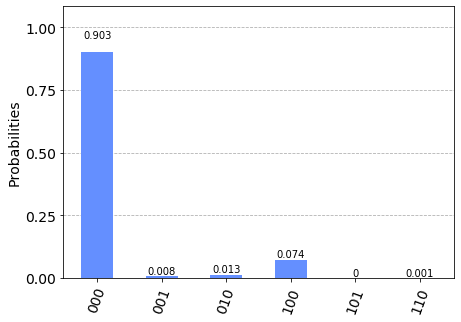

In [20]:
counts = result.get_counts()
plot_histogram(counts)

En este caso, el histograma obtenido mediante la simulación y el histograma obtenido mediante un computador cuántico real discrepan debido a que el simulador generar qubits en un sistema ideal, es decir, que no hay perturbaciones del ambiente, mientras que nuestro computador cuántico, necesita que su procesador esté en el 0 absoluto de temperatura, pero sabemos que por tercera ley de la termodinámica esto es imposible, con lo cual, el procesador se encuentra a una temperatura demasiado pequeña, cercano al cero, y dicha temperatura está relacionada con la energía termina de nuestro sistema, y dicha energía perturba nuestro sistema orginal tal que cambia el estado el cual estamos midiendo, generando estos "errores" en nuestro histograma, aún así el estado $|000>$ es que fue más medido como se esperaba, con pequeñas perturbaciones de los otros sistemas debido al ambiente en el que se encuentra. En algunos circuitos estas perturbaciones puede ser un problema ya que pueden afectar el resultado final, dando como resultado que dichos errores sean más medidos que el resultado esperado, para este tipo de casos, es posible usar otras librerías o algortimos que nos ayuden a corregir este tipo de errores, esta rama de investigación tambien es llamada **Corrección de errores cuánticos**, en este caso no veremos dichos metodos en este texto.

**Q-sphere**

En capítulos anteriores vimos que para representar un vector estado de un qubit, podemos usar la esfera de Bloch donde el vector unitario $\hat{z}$ y $-\hat{z}$ son representados respectivamente como $|0\rangle$ y $|1\rangle$. con la librería qiskit es posible representar cualquier vector estado en la esfera de Bloch con **plot_bloch_multivector()**. construirémos el siguiente vector estado normalizado: $$|q\rangle=\frac{\sqrt3}{2}|0\rangle + \frac{i}{2}|1\rangle, $$ mediante el método **initialize()**, su primer parámetro son las amplitudes de probabilidad en una lista, la posición cero es la amplitud de probabilidad de $|0\rangle$ y la posicion uno es la amplitud de probabilidad de $|1\rangle$


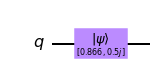

In [71]:
import numpy as np

circuito = QuantumCircuit(1)
amplitudes =[np.sqrt(3)/2,1j/2]
circuito.initialize(amplitudes)
#circuito.measure(0,0)
circuito.draw("mpl")

In [70]:
estado = Statevector.from_int(0,2**1)
estado = estado.evolve(circuito)
estado.draw("latex")

<IPython.core.display.Latex object>

Como observamos en las dos celdas anteriores, generamos nuestro circuito y el resultado es el estado construido con **initialize()** en este caso observamos que la probabilidad de obtener $|0>$ es $\frac{3}{4}$ y de obtener |1> es $\frac{1}{4}$. Al graficar el vector estado en la esfera de Bloch obtenemos.

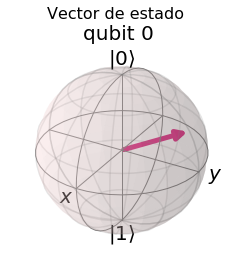

In [69]:
plot_bloch_multivector(estado,title="Vector de estado")

Para los estados con más de 1 qubit, el espacio de bloch no es suficiente, con lo cual, qiskit usa un método alternativo llamado **Q sphere** que usa la siguiente metodología (**Aclaración:** Este método para entender la Q sphere fue obtenida por el autor mismo para comprender la posicion de cada estado en este espacio, aún así, pueden visitar el código que contiene la forma de construir dicha esfera con matplotlib):

Inicialmente, como pasa en el caso de la esfera de Bloch, o sea, para 1 qubit, colocamos $|0>$ en $\hat{z}$ y $|1>$ en $-\hat{z}$ para 2 qubits, colocamos $|00>$ en $\hat{z}$ y $|11>$ $-\hat{z}$ y así sucesivamente para para qubits más grandes. Luego de colocado esto calculamos la cantidad total de estados base posible obtenidos es decir con $2^n$, siendo n el número de qubits, en este caso para 2 qubits obtenemos 4 estados posibles y son: $|00>$, $|01>$,$|10>$ y $|11>$. Luego calculamos la distancia de Hamming entre los estados base. Para calcular la distancia de Hamming es necesario primero hacer la suma de modulo dos entre estados, por ejemplo, para un qubit la suma sumas entre estados base es la siguiente: $$|0>\oplus|0> = |0>,$$ $$|1>\oplus|0> = |1>,$$ $$|0>\oplus|1> = |1> y$$ $$|1>\oplus|1> = |0>.$$ 
Es decir, que al sumar $0$ mas $0$, es $0$ cuando sumamos $0$ mas $1$ es $1$, y cuando sumamos $1$ mas $1$, simplemente sacamos su modulo $2$ es decir el reciduo de la suma o sea el residuo de la suma que es $2$ divido en $2$ es $0$, es decir, $1$ mas $1$ es igual a $0$. Dicha concepción es generalizada para más qubits, es decir, para 2 qubits la suma de $|01>$ y $|10>$ es
$$|01>\oplus|10>=|11>$$.

Ahora, la distancia de Hamming en este caso es el conteo de 1's dentro del resultado de la suma de modulo dos, es decir, la distancia entre |11> y |00> es: $$d_{H}(|11>\oplus|00>)=d_{H}(|11>)=2$$, Finalmente para n qubits, tenemos la siguiente formula para calcular la distancia en grados entre cada estado si lo queremos graficar en una esfera, la cual es: $$grado\_distancia(|qb_{A}>, |qb_{B}>)=\frac{d_{H}(|qb_{A}>\oplus|qb_{B}>)*360^{\circ}}{2*num\_qubits}$$, donde $d_{H}(|qb_{A}>\oplus|qb_{B}>$ es la distancia de Hamming entre el estado base $|qb_{A}>$ y $|qb_{B}>$ y $num_qubits$ es el número de qubits usado. Siguiendo con los dos qubits, calculamos todas las distancias de Hamming posible: $$d_{H}(|00>\oplus|11>)=2,$$ $$d_{H}(|00>\oplus|01>)=1,$$ $$d_{H}(|00>\oplus|10>)=1,$$ $$d_{H}(|11>\oplus|10>)=1,$$ $$d_{H}(|11>\oplus|01>)=1,$$ $$d_{H}(|10>\oplus|01>)=2,$$ $$d_{H}(|00>\oplus|00>)=0,$$ $$d_{H}(|11>\oplus|11>)=0,$$ $$d_{H}(|10>\oplus|10>)=0  y$$ $$d_{H}(|01>\oplus|01>)=0.$$. 

Es decir que para la distancia de un estado base con su mismo estado base su distancia es $0$, con lo cual la distancia en grados es $0^{\circ}$, para los demás tenemos que la distancia en grados es: $$grado\_distancia(|00>, |11>)=180^{\circ},$$ $$grado\_distancia(|00>, |10>)=90^{\circ},$$ $$grado\_distancia(|00>, |01>)=90^{\circ},$$ $$grado\_distancia(|11>, |01>)=90^{\circ},$$ $$grado\_distancia(|11>, |10>)=90^{\circ} y$$ $$grado\_distancia(|10>, |01>)=180^{\circ}.$$ Finalmente, vamos a mirar la grafica de lo anterior con un estado normalizado de la siguiente forma: $$|q> =\frac{1}{2}(|00>+|01>+|10>+|11>)$$. Lo construimos con el método, **initialize()**, en este caso generamos la lista con un for ya que la de probabilidad de todos los estados bas es lo mismo, lo que nos queda:

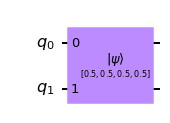

In [131]:
num_qubits = 2
circuito_1 = QuantumCircuit(num_qubits)
amplitudes = []
for i in range(2**num_qubits):
    amplitudes.append(1/np.sqrt(2**num_qubits))
circuito_1.initialize(amplitudes)
circuito_1.draw("mpl")

Comprobamos el estado obtenido, tal que, nos queda:

In [132]:
estado = Statevector.from_int(0,2**num_qubits)
estado = estado.evolve(circuito_1)
estado.draw("latex")

<IPython.core.display.Latex object>

Finalmente, lo que nos queda es graficar en la **q sphere** con la función **plot_state_qsphere()** que pide como paramétro el estado formalizado con Statevector, tal que:

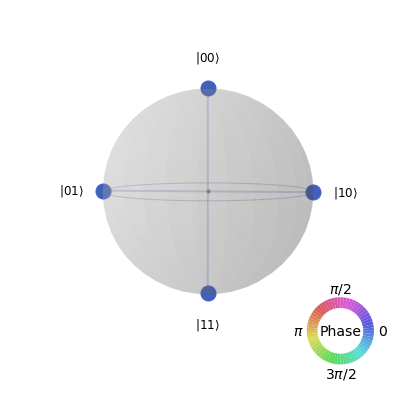

In [134]:
plot_state_qsphere(estado)

Para este este diagama, observamos dos cosas, la primera es que el tamaño del circulo que acompaña a cada uno de los estado base depende del valor de la amplitud de probabilidad, y **Phase**, refiriendose a la fase global del vector estado, es decir que dicha fase no afecta el resultado de la probabilidad por cada estado base, eso quiere decir que los siguientes estados vector, representan al mismo sistema:

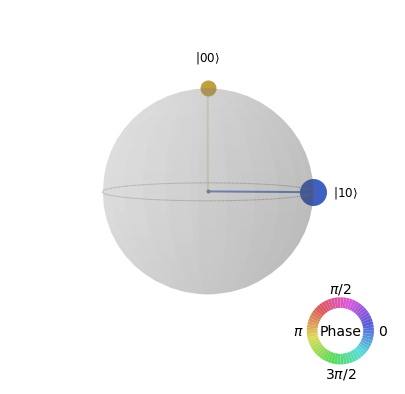

In [154]:
circuito_1 = QuantumCircuit(num_qubits)
amplitudes = [-1/2,0,np.sqrt(3)/2,0]
circuito_1.initialize(amplitudes)
plot_state_qsphere(circuito_1)


In [155]:
estado = Statevector.from_int(0,2**num_qubits)
estado = estado.evolve(circuito_1)
estado.draw("latex")

<IPython.core.display.Latex object>

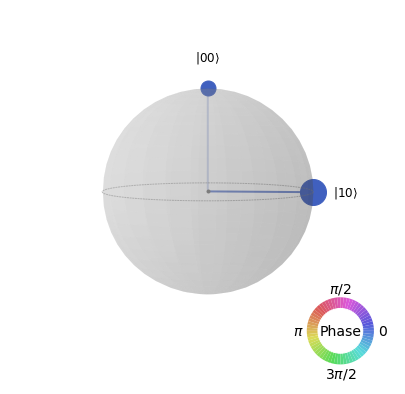

In [156]:
circuito_1 = QuantumCircuit(num_qubits)
amplitudes = [1/2,0,np.sqrt(3)/2,0]
circuito_1.initialize(amplitudes)
plot_state_qsphere(circuito_1)

In [157]:
estado = Statevector.from_int(0,2**num_qubits)
estado = estado.evolve(circuito_1)
estado.draw("latex")

<IPython.core.display.Latex object>

dado a que el estado base $|10>$ tiene una amplitud de probabilidad grande, entonce este se dibuja con una circunferencia más grande.

Finalmente para un sistema con mayor cantidad de qubits, por ejemplo 5, cumplen la misma relación de distancia en grados antes mostrada, pero, los cálculos son más largos de generar. con lo cual únicamente mostraremos la **q sphere** para 5 qubits con equiprobabilidad en sus estados base:

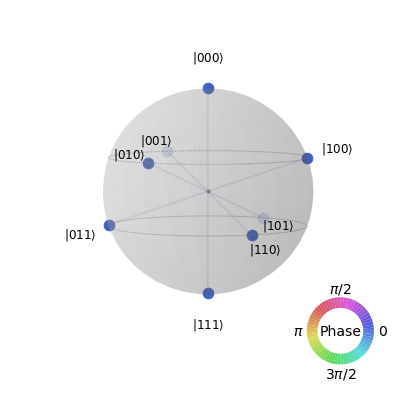

In [158]:
num_qubits = 3
circuito_1 = QuantumCircuit(num_qubits)
amplitudes = []
for i in range(2**num_qubits):
    amplitudes.append(1/np.sqrt(2**num_qubits))
circuito_1.initialize(amplitudes)
plot_state_qsphere(circuito_1)